In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
print("HHH")
cuff_data = np.genfromtxt('cuff_pressure.txt')


HHH


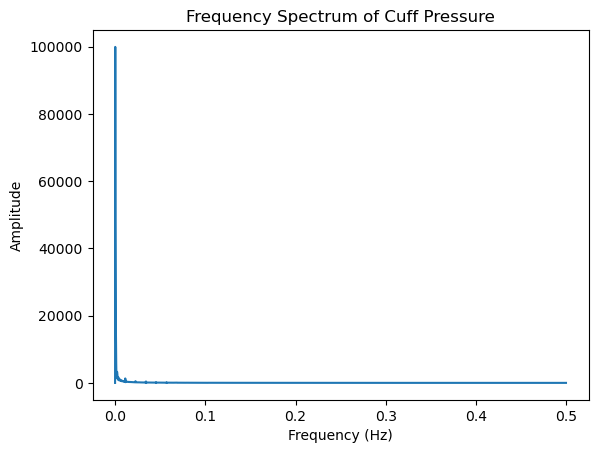

In [12]:
cuff_pressure = cuff_data[:, 3]
cuff_pressure_fft = np.fft.fft(cuff_pressure)
cuff_pressure_fft[0] = 0
n = len(cuff_pressure)
f = np.fft.fftfreq(n, d=1)  # d=1 是采样间隔，假设是1秒

# 绘制频谱图
plt.figure()
plt.plot(f[:n // 2], np.abs(cuff_pressure_fft)[:n // 2])  # 只取正频率部分
plt.title("Frequency Spectrum of Cuff Pressure")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

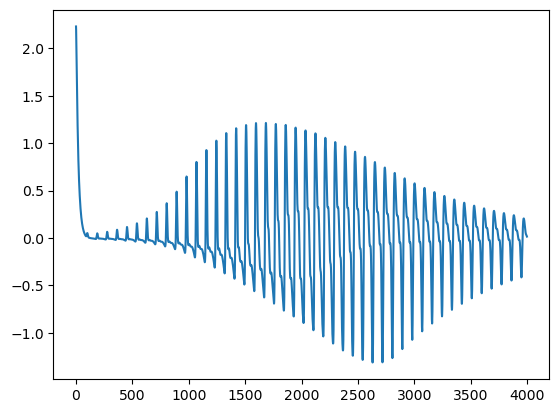

In [4]:
#cuff_data的資料型態為[資料量, 受測編號]
cuff_pressure = cuff_data[:, 3]


b1, a1 = butter(1, 2*0.8/100, 'high')
b2, a2 = butter(1, 2*15/100, 'low')
cuff_pressure = filtfilt(b1, a1, cuff_pressure)
cuff_pressure = filtfilt(b2, a2, cuff_pressure)
peak_number = cuff_pressure.argmax()
#下降點為700
plt.figure
plt.plot(cuff_pressure[peak_number:])
plt.show


In [19]:
dt = 1
time = np.arange(0, len(cuff_pressure)*dt, dt)
print(len(cuff_pressure))

4700


In [17]:
b, a = find_peaks(cuff_pressure)
b = b[1:]
print(b[0])
b = np.array(b)

102


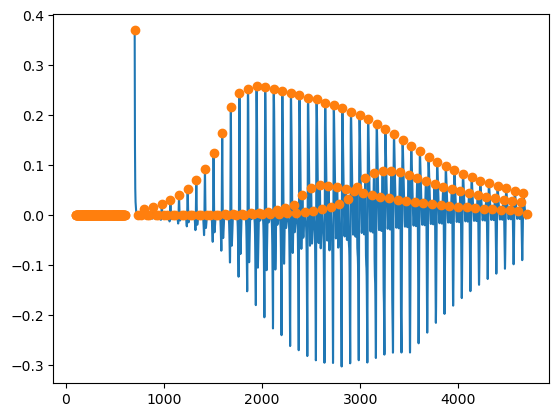

In [20]:
plt.figure()
plt.plot(time[peak_number:], cuff_pressure[peak_number:])
plt.plot(time[b], cuff_pressure[b], 'o')
plt.show()

In [185]:
sum_periods = 0
for i in range(1, len(b)):
    sum_periods = sum_periods + b[i] - b[i-1]
period = sum_periods / (len(b)-1)

print("平均心跳", period)

平均心跳 87.8974358974359


In [ ]:
filtered_cuff_pressure = np.zeros(len(cuff_pressure))
for i in range(0, len(time)):
    if time[i] >= period * 0.5 and time[i] <= time[-1] - period * 0.5:
        lower_index = int(i - round(period * 0.5 / dt))
        upper_index = int(i + round(period * 0.5 / dt))
        
        arg_pressure = 0
        for idx in range(lower_index, upper_index):
            #製作一個moving average
            arg_pressure = arg_pressure + cuff_pressure[idx]
        arg_pressure = arg_pressure / (upper_index - lower_index)
        filtered_cuff_pressure[i] = cuff_pressure[i] - arg_pressure

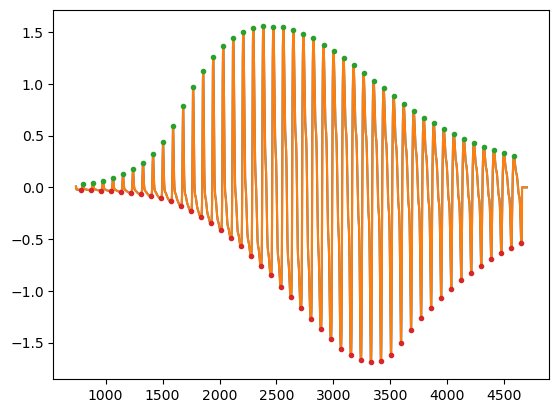

In [187]:
cuff_pressure = cuff_pressure[740:]
plt.figure(2)
plt.plot(time[740:], filtered_cuff_pressure[740:])
filtered_cuff_pressure = filtered_cuff_pressure[740:]
time = time[740:]

peaks_pos, props_pos = find_peaks(filtered_cuff_pressure)
peaks_neg, props_neg = find_peaks(-filtered_cuff_pressure)
plt.figure(2)
plt.plot(time, filtered_cuff_pressure)
plt.plot(time[peaks_pos], filtered_cuff_pressure[peaks_pos], '.')
plt.plot(time[peaks_neg], filtered_cuff_pressure[peaks_neg], '.')

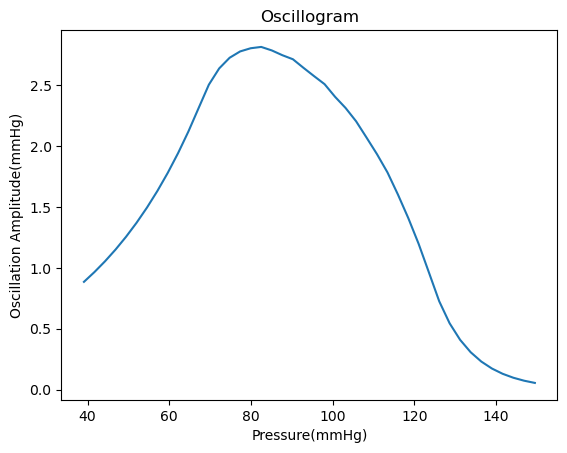

In [188]:
#Create a Oscillogram
OSC_pressure = []
OSC_amplitude = []
for i in range(0, min(len(peaks_pos), len(peaks_neg))):
    a = abs(filtered_cuff_pressure[peaks_pos[i]] - filtered_cuff_pressure[peaks_neg[i]])
    OSC_amplitude.append(a)
    b = (cuff_pressure[peaks_pos[i]] + cuff_pressure[peaks_neg[i]]) / 2
    OSC_pressure.append(b)
plt.figure(3)
plt.plot(OSC_pressure, OSC_amplitude)
plt.xlabel('Pressure(mmHg)')
plt.ylabel('Oscillation Amplitude(mmHg)')
plt.title('Oscillogram')
plt.show()

In [189]:
#Part 1
sys = 0
dia = 0
max_dt = 0
min_dt = 0
check_a = []
check_b = []
max_map = 0
for i in range(1, len(OSC_amplitude)):
    derivative = (OSC_amplitude[i] - OSC_amplitude[i - 1]) / (OSC_pressure[i] - OSC_pressure[i-1])
    if derivative > max_dt :
        max_dt = derivative
        dia = OSC_pressure[i]
        check_a.append(i)
    if derivative < min_dt :
        min_dt = derivative
        sys = OSC_pressure[i]
        check_b.append(i)
    if(OSC_amplitude[i] > max_map):
        max_map = OSC_amplitude[i]

print(check_a, check_b)
print("sys", sys)
print("Dia", dia)
print(check_a[-1])


[27, 28, 29, 30, 31, 32, 33] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sys 123.5762094536748
Dia 64.67071687844062
33


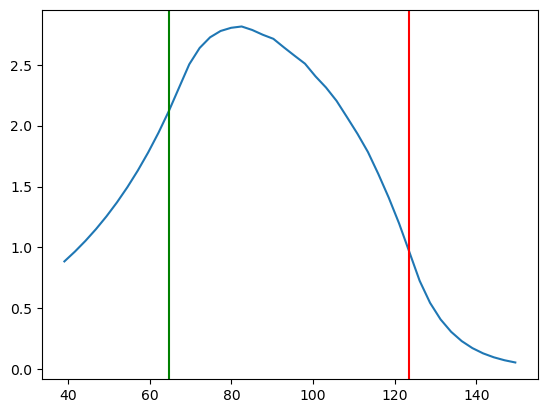

In [190]:
plt.figure(4)
plt.plot(OSC_pressure, OSC_amplitude)
plt.axvline(x = OSC_pressure[check_a[-1]], color = 'g')
plt.axvline(x = OSC_pressure[check_b[-1]], color = 'r')
plt.show()

In [191]:
#Fixed ration method
fixed_ration_sys = 0.45
fixed_ration_dia = 0.85


target_sys = fixed_ration_sys * max_map
target_dia = fixed_ration_dia * max_map
sys_fixed = 0
dia_fixed = 0
delta_d = 1e10
delta_s = 1e10
for i in range(0, len(OSC_pressure)):
    if(np.abs(OSC_amplitude[i] - target_dia) < delta_d) and (OSC_pressure [i] < max_map):
        dia_fixed = OSC_pressure[i]
        delta_d = np.abs(OSC_amplitude[i] - target_dia)

    if(np.abs(OSC_amplitude[i] - target_sys) < delta_s) and (OSC_pressure[i] > max_map):
        sys_fixed = OSC_pressure[i]
        delta_s = np.abs(OSC_amplitude[i] - target_sys)
print("SYS", sys_fixed)
print("Dia", dia_fixed)

SYS 49.41239056276436
Dia 0
